In [4]:
import tensorflow as tf
import keras
tf.__version__
keras.__version__

'3.11.3'

[2025-11-05 15:36:22,201][ INFO][keras.py]::Feature maps shape: [[None, 23, 23, 1]]
[2025-11-05 15:36:22,202][ INFO][keras.py]::Input shape       : (None, 64, 64, 3)


[2025-11-05 15:36:22,236][ INFO][base.py]::Estimated receptive field for feature map [0]: ReceptiveFieldDescription(offset=(np.float64(10.0), np.float64(10.0)), stride=(np.float64(2.0), np.float64(2.0)), size=Size(w=np.int64(20), h=np.int64(20)))


input_image ['feature_grid']
INP <KerasTensor shape=(None, 64, 64, 3), dtype=float32, sparse=False, ragged=False, name=input_image>
input_image
[FeatureMapDescription(size=Size(w=23, h=23), rf=ReceptiveFieldDescription(offset=(np.float64(10.0), np.float64(10.0)), stride=(np.float64(2.0), np.float64(2.0)), size=Size(w=np.int64(20), h=np.int64(20))))]


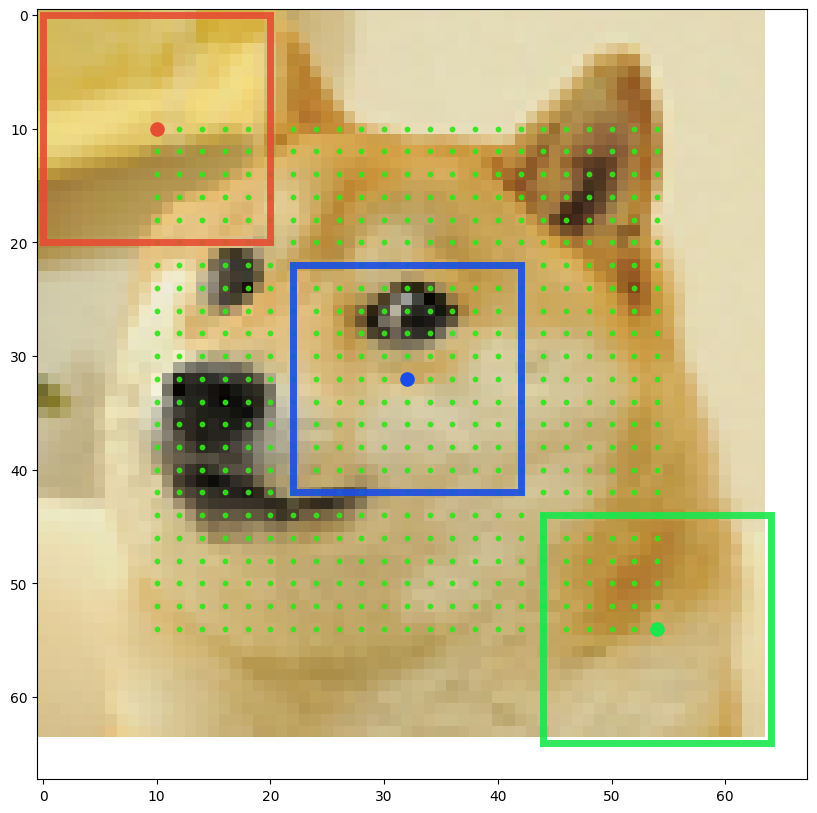

In [5]:


from tensorflow.keras.layers import Activation, Conv2D, Input
from tensorflow.keras.layers import AvgPool2D
from tensorflow.keras.models import Model
from receptivefield.image import get_default_image
from receptivefield.keras import KerasReceptiveField
import matplotlib.pyplot as plt

# define model function
def model_build_func(input_shape):
    act = 'linear' # see Remarks
    inp = Input(shape=input_shape, name='input_image')
    print("INP", inp)
    x = Conv2D(32, (7, 7), activation=act)(inp)
    x = Conv2D(32, (5, 5), activation=act)(x)
    x = AvgPool2D(2)(x)
    x = Conv2D(64, (5, 5), activation=act, name='feature_grid')(x)
    x = AvgPool2D(2)(x)
    model = Model(inp, x)
    return model

shape = [64, 64, 3]
# compute receptive field
rf = KerasReceptiveField(model_build_func)
rf_params = rf.compute(shape, 'input_image', ['feature_grid'])

# debug receptive field
rf.plot_rf_grids(get_default_image(shape, name='doge'), figsize=(10, 10))
print(rf_params)



In [6]:


model = model_build_func(input_shape=(96, 96, 3))
#model.summary()

model.get_layer('input_image')

INP <KerasTensor shape=(None, 96, 96, 3), dtype=float32, sparse=False, ragged=False, name=input_image>


<InputLayer name=input_image, built=True>

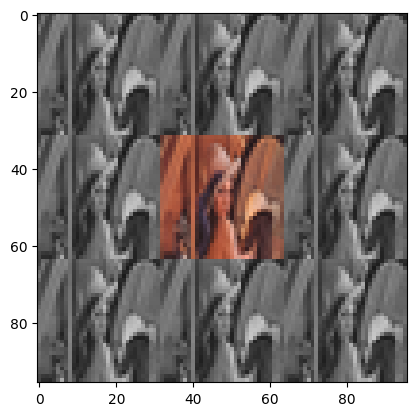

In [7]:

from receptivefield.image import get_default_image
import matplotlib.pyplot as plt
# Load sample image of `Lena`.
image = get_default_image(shape=(32, 32), tile_factor=1)
plt.imshow(image) 



In [8]:
from receptivefield.keras import KerasReceptiveField

rf = KerasReceptiveField(model_build_func, init_weights=False)

rf_params = rf.compute(
    input_shape=image.shape, 
    input_layer='input_image', 
    output_layers=['feature_grid']
)
print(rf_params)

[2025-11-05 15:36:22,483][ INFO][keras.py]::Feature maps shape: [[None, 39, 39, 1]]
[2025-11-05 15:36:22,484][ INFO][keras.py]::Input shape       : (None, 96, 96, 3)


input_image ['feature_grid']
INP <KerasTensor shape=(None, 96, 96, 3), dtype=float32, sparse=False, ragged=False, name=input_image>
input_image


[2025-11-05 15:36:22,747][ INFO][base.py]::Estimated receptive field for feature map [0]: ReceptiveFieldDescription(offset=(np.float64(10.0), np.float64(10.0)), stride=(np.float64(2.0), np.float64(2.0)), size=Size(w=np.int64(20), h=np.int64(20)))


[FeatureMapDescription(size=Size(w=39, h=39), rf=ReceptiveFieldDescription(offset=(np.float64(10.0), np.float64(10.0)), stride=(np.float64(2.0), np.float64(2.0)), size=Size(w=np.int64(20), h=np.int64(20))))]


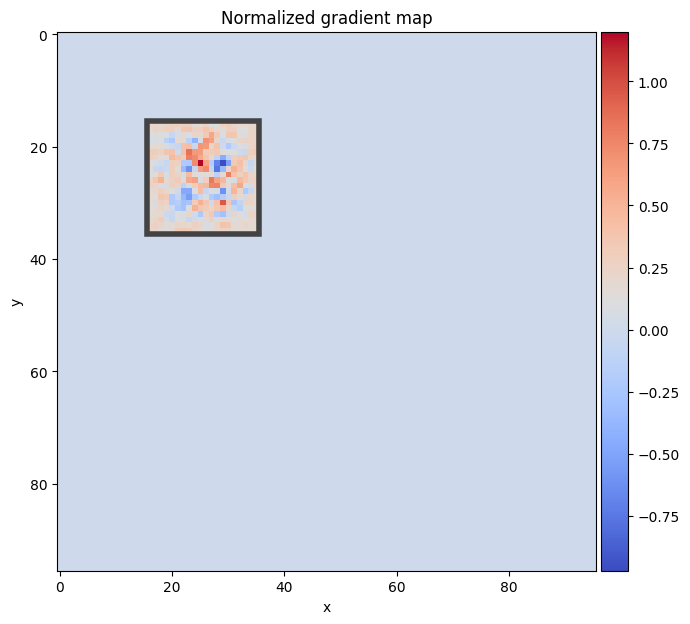

In [10]:
rf.plot_gradient_at(fm_id=0, point=(8, 8), image=None, figsize=(7, 7))

In [ ]:
image.shape

(96, 96, 3)